In [1]:
import os
os.environ['CUDA_LAUNCH_BLOCKING'] = "1"
from google.colab import drive
drive.mount('/content/drive')
%cd '/content/drive/MyDrive/AdaptOrDie/'

Mounted at /content/drive
/content/drive/MyDrive/AdaptOrDie


In [2]:
import json
import os
from IPython.display import Image
import numpy as np
%load_ext autoreload
%autoreload 2

In [3]:
def load_json(path):
  with open(path) as f:
      data = [json.loads(line) for line in f]
  return data

def create_dir(dir_path):
    if not os.path.exists(dir_path):
        os.makedirs(dir_path)

In [ ]:
# !git config --global user.email "ltuzova3@gatech.edu"
# !git config --global user.name "Lyudmila Tuzova"

# Amazon Review Dataset
The version used in the "Ups and downs: Modeling the visual evolution of fashion trends with one-class collaborative filtering":
https://cseweb.ucsd.edu/~jmcauley/datasets/amazon/links.html \
There are newer versions available, but this can be used to reproduce paper results. Didn't get yet how they got 11GB dataset with 24.75M reviews, as all the options by the link suggest other numbers.

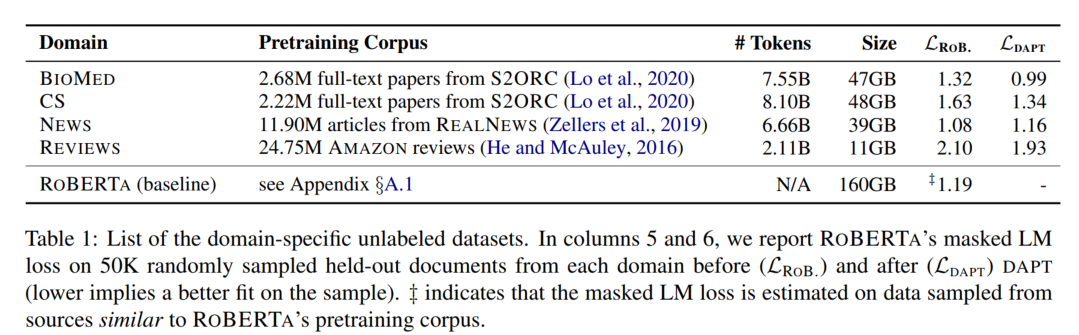

In [ ]:
Image (filename="images/Table_1.png", retina=True)

# Classification Review Datasets
Look at the examples by this link (I replaced the dataset dir to the needed ones) :
https://github.com/allenai/dont-stop-pretraining/tree/master?tab=readme-ov-file#downloading-data

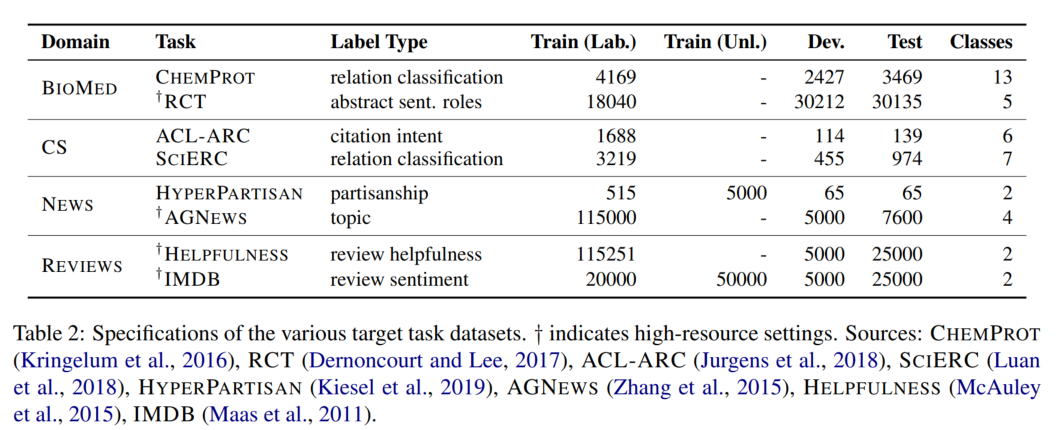

In [ ]:
Image (filename="images/Table_2.png", retina=True)

In [ ]:
ds= {"imdb": {
        "data_dir": "https://s3-us-west-2.amazonaws.com/allennlp/dont_stop_pretraining/data/imdb/",
        "dataset_size": 20000
    },
    "amazon": {
        "data_dir": "https://s3-us-west-2.amazonaws.com/allennlp/dont_stop_pretraining/data/amazon/",
        "dataset_size": 115251
    }}

In [ ]:
create_dir('datasets')
create_dir('datasets/classifier')
create_dir('datasets/classifier/imdb')
create_dir('datasets/classifier/amazon')

## IMDB Dataset

In [ ]:
!curl -Lo train.jsonl https://allennlp.s3-us-west-2.amazonaws.com/dont_stop_pretraining/data/imdb/train.jsonl --output-dir 'datasets/classifier/imdb'
!curl -Lo dev.jsonl https://allennlp.s3-us-west-2.amazonaws.com/dont_stop_pretraining/data/imdb/dev.jsonl --output-dir 'datasets/classifier/imdb'
!curl -Lo test.jsonl https://allennlp.s3-us-west-2.amazonaws.com/dont_stop_pretraining/data/imdb/test.jsonl --output-dir 'datasets/classifier/imdb'

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 25.6M  100 25.6M    0     0  9197k      0  0:00:02  0:00:02 --:--:-- 9195k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 6651k  100 6651k    0     0  3633k      0  0:00:01  0:00:01 --:--:-- 3632k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 31.4M  100 31.4M    0     0  10.4M      0  0:00:02  0:00:02 --:--:-- 10.4M


In [ ]:
train_json = load_json("datasets/classifier/imdb/train.jsonl")
dev_json = load_json("datasets/classifier/imdb/dev.jsonl")
test_json = load_json("datasets/classifier/imdb/test.jsonl")
print("IMDB ds stat")
print("Train ds: {0}".format(len(train_json)))
print("Dev ds: {0}".format(len(dev_json)))
print("Test ds: {0}".format(len(test_json)))

IMDB ds stat
Train ds: 20000
Dev ds: 5000
Test ds: 25000


In [ ]:
train_json[0]

{'id': 'train_21949',
 'text': "Dr. Seuss would sure be mad right now if he was alive. Cat in the Hat proves to show how movie productions can take a classic story and turn it into a mindless pile of goop. We have Mike Myers as the infamous Cat in the Hat, big mistake! Myers proves he can't act in this film. He acts like a prissy show girl with a thousand tricks up his sleeve. The kids in this movie are all right, somewhere in between the lines of dull and annoying. The story is just like the original with a couple of tweaks and like most movies based on other stories, never tweak with the original story! Bringing in the evil neighbor Quin was a bad idea. He is a stupid villain that would never get anywhere in life.This movie is like a rejected comic strip from the newspaper if you think about it. The film sure does look tacky! Sure there are a funny adult jokes like where the cat cuts of his tail and the censor goes off before he says a naughty word, mildly funny. At least the Grinch 

In [ ]:
np.unique([t['label'] for t in train_json])

array([0, 1])

## Helfulness Dataset

In [ ]:
!curl -Lo train.jsonl https://allennlp.s3-us-west-2.amazonaws.com/dont_stop_pretraining/data/amazon/train.jsonl --output-dir 'datasets/classifier/amazon'
!curl -Lo dev.jsonl https://allennlp.s3-us-west-2.amazonaws.com/dont_stop_pretraining/data/amazon/dev.jsonl --output-dir 'datasets/classifier/amazon'
!curl -Lo test.jsonl https://allennlp.s3-us-west-2.amazonaws.com/dont_stop_pretraining/data/amazon/test.jsonl --output-dir 'datasets/classifier/amazon'

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  100M  100  100M    0     0  14.6M      0  0:00:06  0:00:06 --:--:-- 19.1M
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 4523k  100 4523k    0     0  2756k      0  0:00:01  0:00:01 --:--:-- 2756k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 21.7M  100 21.7M    0     0  8060k      0  0:00:02  0:00:02 --:--:-- 8058k


In [ ]:
train_json_h = load_json("datasets/classifier/amazon/train.jsonl")
dev_json_h = load_json("datasets/classifier/amazon/dev.jsonl")
test_json_h = load_json("datasets/classifier/amazon/test.jsonl")
print("Helfulness ds stat")
print("Train ds: {0}".format(len(train_json_h)))
print("Dev ds: {0}".format(len(dev_json_h)))
print("Test ds: {0}".format(len(test_json_h)))

Helfulness ds stat
Train ds: 115251
Dev ds: 5000
Test ds: 25000


In [ ]:
train_json_h[0]

{'id': 'r100621',
 'text': 'Works fine for my new Samsung Galaxy S3\n\nWorks great. No problems with my Samsung Galaxy S3.  It charges with no problems.  It lights up when it is charging.',
 'label': 'helpful'}

In [ ]:
np.unique([t['label'] for t in train_json_h])

array(['helpful', 'unhelpful'], dtype='<U9')

# Train Roberta Classifier

## Allen NLP version based on "dont-stop-pretraining" code.

The following steps have been done:
1. First tried (without success) to install the pinned version of allennlp used in the [repo](https://github.com/allenai/dont-stop-pretraining/blob/master/environment.yml)
2. Installed the last version of allennlp ("pip install allennlp"). To do don't-stop-pretraining work with the new version, a range of modifications were made, primarily in [training config file](https://github.com/allenai/dont-stop-pretraining/blob/master/training_config/classifier.jsonnet) due to changes in the API. The modified code worked until the end of the first training epoch and then broke due to the attempt to create a hard link in allenlp/common/file_utils.py.
3. Downloaded Allenlp source code, fixed method, and rebuilt the package.

Steps to reproduce these results:
1. Download allennlp-2.10.1 with wget command below.

2. Change a method in /allennlp/common/file_utils.py.
```python
# Commend:
def hardlink_or_copy(source: PathOrStr, dest: PathOrStr):
    try:
        os.link(source, dest)
    except OSError as e:
        if e.errno in {18, 95}:  # Cross-device link and Windows
            shutil.copy(source, dest)
        else:
            raise
# add:
 def hardlink_or_copy(source: PathOrStr, dest: PathOrStr):
     shutil.copy(source, dest)
```
3. Install AllenNLP and dont-stop-pretraining dependencies (see below)
4. cd to dont-stop-pretraining-modified repo.
5. Run training

### Results:
The training results are close to those reported in the paper, though not identical. There might be a couple of reasons, including the differences in the updated repo, changes in the training config (e.g., different optimizer), seeds values, etc. Also authors mentions that they reported results averaged accross multiple seeds.

TBD: commit channges made in allenai, dont-stop-pretrainint.

IMDB:
```json
Metrics: {
  "best_epoch": 1,
  "peak_worker_0_memory_MB": 8177.7734375,
  "peak_gpu_0_memory_MB": 12061.61767578125,
  "training_duration": "0:41:36.113210",
  "epoch": 4,
  "training_f1": 0.9887499809265137,
  "training_accuracy": 0.98875,
  "training_loss": 0.03665804691084195,
  "training_worker_0_memory_MB": 8177.7734375,
  "training_gpu_0_memory_MB": 12061.61767578125,
  "validation_f1": 0.9469920992851257,
  "validation_accuracy": 0.947,
  "validation_loss": 0.1861831521564803,
  "best_validation_f1": 0.9469920992851257,
  "best_validation_accuracy": 0.947,
  "best_validation_loss": 0.14288301173799905,
  "test_f1": 0.9510282874107361,
  "test_accuracy": 0.95104,
  "test_loss": 0.1403899354759189
}
```

Hopefulness Metrics (just 3 epochs for now as the training is quite long, can increase with further iterations):
```json
Metrics: {
  "best_epoch": 0,
  "peak_worker_0_memory_MB": 10924.59765625,
  "peak_gpu_0_memory_MB": 12048.55517578125,
  "training_duration": "1:44:20.554910",
  "epoch": 2,
  "training_f1": 0.742903470993042,
  "training_accuracy": 0.8916712219416751,
  "training_loss": 0.26439889813119183,
  "training_worker_0_memory_MB": 10924.59765625,
  "training_gpu_0_memory_MB": 12048.55517578125,
  "validation_f1": 0.672386422753334,
  "validation_accuracy": 0.8714,
  "validation_loss": 0.31397306263006436,
  "best_validation_f1": 0.676495835185051,
  "best_validation_accuracy": 0.8706,
  "best_validation_loss": 0.3102900910372742,
  "test_f1": 0.6696934700012207,
  "test_accuracy": 0.87092,
  "test_loss": 0.3079459099569766
}
```

In [10]:
# Download and unpack Allen NLP
!wget https://github.com/allenai/allennlp/archive/refs/tags/v2.10.1.tar.gz
!tar -xzf v2.10.1.tar.gz

In [11]:
# Clone dont-stop-pretraining - Don't need if use modified version from git
# !git clone https://github.com/allenai/dont-stop-pretraining.git

Cloning into 'dont-stop-pretraining'...
remote: Enumerating objects: 443, done.
remote: Counting objects: 100% (58/58), done.
remote: Compressing objects: 100% (10/10), done.
remote: Total 443 (delta 50), reused 48 (delta 48), pack-reused 385
Receiving objects: 100% (443/443), 565.50 KiB | 2.06 MiB/s, done.
Resolving deltas: 100% (234/234), done.


In [8]:
# Intsall dependencies
# Better with terminal, notebook required restarting runtime, not sure it would properly work.
%cd allennlp-2.10.1/
!pip install -U pip setuptools wheel
!pip install --editable .[all]

# Needed for dont-stop-pretraining
!pip install overrides

In [5]:
%cd '/content/drive/MyDrive/AdaptOrDie/dont-stop-pretraining-modified'

/content/drive/MyDrive/AdaptOrDie/dont-stop-pretraining


In [5]:
# Model training output is stored here. Error if not deleted, may fix later.
#! mv model_logs/* model_logs_archive/
#! rm -rf model_logs

In [9]:
!python -m scripts.train \
        --config training_config/classifier.jsonnet \
        --serialization_dir model_logs/imdb_base \
        --hyperparameters ROBERTA_CLASSIFIER_SMALL \
        --dataset imdb \
        --model roberta-base \
        --device 0 \
        --perf +f1 \
        --evaluate_on_test

2024-04-03 23:25:35.176521: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-04-03 23:25:35.176576: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-04-03 23:25:35.178840: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-04-03 23:25:35.190280: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-04-03 23:25:37.525689: W tensorflow/compiler/tf2

In [8]:
! rm -rf model_logs/amazon_base/

In [9]:
!python -m scripts.train \
        --config training_config/classifier.jsonnet \
        --serialization_dir model_logs/amazon_base \
        --hyperparameters ROBERTA_CLASSIFIER_SMALL \
        --dataset amazon \
        --model roberta-base \
        --device 0 \
        --perf +f1 \
        --evaluate_on_test

2024-04-04 02:41:46.360662: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-04-04 02:41:46.360733: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-04-04 02:41:46.362400: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-04-04 02:41:46.371106: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-04-04 02:41:47.708379: W tensorflow/comp

#